In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
import re
%matplotlib inline

**To get a brief overview, this notebook is dedicated to 5 sections as follows**
1. Context of dataset
2. Data cleaning
3. EDA
4. Results
5. Conclusion

**Loading file Hp_laptos.csv into dataframe**

In [2]:
df=pd.read_csv('Hp_laptops.csv',encoding='unicode-escape')

**Let's have glance at a bit of data**

In [3]:
df.head()

,Unnamed: 0,Name,actual_price,discout,display,final_price,generation,graphic_card,hard_disk,included_items,os_installed,processor,processor_company,processor_type,ram,rating
0,0,HP ENVY x360 - 13-ag0035au,"83,496","10,506","13.3"" FHD multitouch-enabled edge-to-edge glas...","72,990",NaN,AMD Radeon Vega 8 Graphics,256 GB SSD,NaN,Windows 10 Home Single Language 64,AMD Ryzen 5 processor,AMD,Ryzen 5,8 GB DDR4-2400 SDRAM (onboard),3.6667
1,1,HP Gaming Pavilion - 15-cx0140tx,"86,476","13,486",NaN,"72,990",8.0,NVIDIA® GeForce® GTX 1050 (4 GB GDDR5 dedicated),1 TB 7200 rpm SATA,"HP Odyssey backpack (Worth ?3,499),Microsoft O...",Windows 10 Home Single Language 64,8th Generation Intel® Core i5 processor,Intel,i5,8 GB DDR4-2666 SDRAM (1 x 8 GB),5.0000
2,2,HP Notebook - 15-da0435tx,"50,292","5,712",NaN,"44,580",7.0,NVIDIA® GeForce® MX110 (2 GB DDR3 dedicated),1 TB 5400 rpm SATA,NaN,Windows 10 Home Single Language 64,7th Generation Intel® Core i3 processor,Intel,i3,8 GB DDR4-2133 SDRAM (1 x 8 GB),4.0000
3,3,HP Notebook - 15g-dr0006tx,"66,137","7,146",NaN,"58,991",8.0,NVIDIA® GeForce® MX110 (2 GB DDR3 dedicated),1 TB 5400 rpm SATA,"HP Original Laptop Bag (Worth ?1,123),1 Year O...",Windows 10 Home Single Language 64,8th Generation Intel® Core i5 processor,Intel,i5,8 GB DDR4-2400 SDRAM (1 x 8 GB),4.0625
4,4,HP Notebook 15-da1030tu,"50,720","3,730",NaN,"46,990",8.0,NaN,1 TB 5400 rpm SATA,"HP Original Laptop Bag (Worth ?1,123),Microsof...",Windows 10 Home 64,8th Generation Intel® Core i5 processor,Intel,i5,4 GB DDR4-2400 SDRAM,2.0000


**Information of each column in the dataframe**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 16 columns):
Unnamed: 0           163 non-null int64
Name                 163 non-null object
actual_price         163 non-null object
discout              163 non-null object
display              29 non-null object
final_price          163 non-null object
generation           131 non-null float64
graphic_card         161 non-null object
hard_disk            161 non-null object
included_items       131 non-null object
os_installed         163 non-null object
processor            149 non-null object
processor_company    146 non-null object
processor_type       146 non-null object
ram                  161 non-null object
rating               158 non-null float64
dtypes: float64(2), int64(1), object(13)
memory usage: 20.5+ KB


**Shape of the dataframe**

In [5]:
df.shape

(163, 16)

In the dataframe first column is no use at all 

**Dropping the first column**

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

**Data cleaning**

- check if any NA's are present

In [7]:
df.isnull().sum()

Name                   0
actual_price           0
discout                0
display              134
final_price            0
generation            32
graphic_card           2
hard_disk              2
included_items        32
os_installed           0
processor             14
processor_company     17
processor_type        17
ram                    2
rating                 5
dtype: int64

The column display has 134 NaN values which is more than 40% of total data. So we can drop it

In [8]:
df.drop(['display'],axis=1,inplace=True)

In [9]:
df.head()

,Name,actual_price,discout,final_price,generation,graphic_card,hard_disk,included_items,os_installed,processor,processor_company,processor_type,ram,rating
0,HP ENVY x360 - 13-ag0035au,"83,496","10,506","72,990",NaN,AMD Radeon Vega 8 Graphics,256 GB SSD,NaN,Windows 10 Home Single Language 64,AMD Ryzen 5 processor,AMD,Ryzen 5,8 GB DDR4-2400 SDRAM (onboard),3.6667
1,HP Gaming Pavilion - 15-cx0140tx,"86,476","13,486","72,990",8.0,NVIDIA® GeForce® GTX 1050 (4 GB GDDR5 dedicated),1 TB 7200 rpm SATA,"HP Odyssey backpack (Worth ?3,499),Microsoft O...",Windows 10 Home Single Language 64,8th Generation Intel® Core i5 processor,Intel,i5,8 GB DDR4-2666 SDRAM (1 x 8 GB),5.0000
2,HP Notebook - 15-da0435tx,"50,292","5,712","44,580",7.0,NVIDIA® GeForce® MX110 (2 GB DDR3 dedicated),1 TB 5400 rpm SATA,NaN,Windows 10 Home Single Language 64,7th Generation Intel® Core i3 processor,Intel,i3,8 GB DDR4-2133 SDRAM (1 x 8 GB),4.0000
3,HP Notebook - 15g-dr0006tx,"66,137","7,146","58,991",8.0,NVIDIA® GeForce® MX110 (2 GB DDR3 dedicated),1 TB 5400 rpm SATA,"HP Original Laptop Bag (Worth ?1,123),1 Year O...",Windows 10 Home Single Language 64,8th Generation Intel® Core i5 processor,Intel,i5,8 GB DDR4-2400 SDRAM (1 x 8 GB),4.0625
4,HP Notebook 15-da1030tu,"50,720","3,730","46,990",8.0,NaN,1 TB 5400 rpm SATA,"HP Original Laptop Bag (Worth ?1,123),Microsof...",Windows 10 Home 64,8th Generation Intel® Core i5 processor,Intel,i5,4 GB DDR4-2400 SDRAM,2.0000


In [10]:
df.actual_price.dtype

dtype('O')

In the dataframe actual_price,final_price and discount columns should be of numerical datatype but they are of object datatype 
in the dataframe so function strtoint is definded below which removes the comma in the values and convert them into int datatype

In [11]:
def strtoint(column):
    return column.apply(lambda x:int(x.replace(',','')))

In [12]:
df['actual_price']=strtoint(df['actual_price'])
df['discout']=strtoint(df['discout'])
df['final_price']=strtoint(df['final_price'])

In [13]:
df.head()

,Name,actual_price,discout,final_price,generation,graphic_card,hard_disk,included_items,os_installed,processor,processor_company,processor_type,ram,rating
0,HP ENVY x360 - 13-ag0035au,83496,10506,72990,NaN,AMD Radeon Vega 8 Graphics,256 GB SSD,NaN,Windows 10 Home Single Language 64,AMD Ryzen 5 processor,AMD,Ryzen 5,8 GB DDR4-2400 SDRAM (onboard),3.6667
1,HP Gaming Pavilion - 15-cx0140tx,86476,13486,72990,8.0,NVIDIA® GeForce® GTX 1050 (4 GB GDDR5 dedicated),1 TB 7200 rpm SATA,"HP Odyssey backpack (Worth ?3,499),Microsoft O...",Windows 10 Home Single Language 64,8th Generation Intel® Core i5 processor,Intel,i5,8 GB DDR4-2666 SDRAM (1 x 8 GB),5.0000
2,HP Notebook - 15-da0435tx,50292,5712,44580,7.0,NVIDIA® GeForce® MX110 (2 GB DDR3 dedicated),1 TB 5400 rpm SATA,NaN,Windows 10 Home Single Language 64,7th Generation Intel® Core i3 processor,Intel,i3,8 GB DDR4-2133 SDRAM (1 x 8 GB),4.0000
3,HP Notebook - 15g-dr0006tx,66137,7146,58991,8.0,NVIDIA® GeForce® MX110 (2 GB DDR3 dedicated),1 TB 5400 rpm SATA,"HP Original Laptop Bag (Worth ?1,123),1 Year O...",Windows 10 Home Single Language 64,8th Generation Intel® Core i5 processor,Intel,i5,8 GB DDR4-2400 SDRAM (1 x 8 GB),4.0625
4,HP Notebook 15-da1030tu,50720,3730,46990,8.0,NaN,1 TB 5400 rpm SATA,"HP Original Laptop Bag (Worth ?1,123),Microsof...",Windows 10 Home 64,8th Generation Intel® Core i5 processor,Intel,i5,4 GB DDR4-2400 SDRAM,2.0000


The generation column has 32 missing values Let's see the unique values and their frequency details

In [14]:
df.generation.value_counts()

8.0    99
7.0    29
6.0     3
Name: generation, dtype: int64

generations are for the Intel core processor series. AMD, Intel pentium series doesn't have generation so replace those with version 1

In [15]:
df.generation.fillna('1.0',inplace=True)
df.generation.isnull().sum()

0

The column graphic_card has two null values.Let's fill them with mode of that column

In [16]:
df.graphic_card.value_counts()[:5]

Intel® UHD Graphics 620                                    54
Intel® HD Graphics 620                                     19
AMD Radeon Pro WX 3100 Graphics (2 GB GDDR5 dedicated)    12
NVIDIA® Quadro® P1000 (4 GB GDDR5 dedicated)                8
NVIDIA® Quadro® P600 (4 GB GDDR5 dedicated)                 7
Name: graphic_card, dtype: int64

In [17]:
df.graphic_card.fillna(df.graphic_card.mode()[0],inplace=True)
df.graphic_card.isnull().sum()

0

In [18]:
df.hard_disk.value_counts()[:5]

1 TB 5400 rpm SATA        51
1 TB 7200 rpm SATA        16
512 GB PCIe® NVMe SSD    13
512 GB SSD                13
256 GB SSD                11
Name: hard_disk, dtype: int64

In [19]:
df.hard_disk.fillna(df.hard_disk.mode()[0],inplace=True)
df.hard_disk.isnull().sum()

0

In [20]:
df.included_items.fillna('Not provided',inplace=True)
df.included_items.isnull().sum()

0

In [21]:
df.ram.fillna(df.ram.mode()[0],inplace=True)
df.included_items.isnull().sum()

0

In [22]:
df.rating.fillna(df.rating.mean(),inplace=True)
df.rating.isnull().sum()

0

In [23]:
df[df.processor_company.isnull()]

,Name,actual_price,discout,final_price,generation,graphic_card,hard_disk,included_items,os_installed,processor,processor_company,processor_type,ram,rating
40,HP ZBook 15v G5 Mobile Workstation,225937,22095,203842,1.0,NVIDIA® Quadro® P600 (4 GB GDDR5 dedicated),1 TB 7200 rpm SATA,"HP Original Bag (Worth ?1,499) (#5DD44PA),3 Y...",Windows 10 Pro 64,16 GB DDR4-2666 SDRAM (1 x 16 GB),NaN,NaN,8 GB DDR4-2400 SDRAM (1 x 8 GB),1.194378
41,HP ZBook 15v G5 Mobile Workstation,233611,22861,210750,1.0,NVIDIA® Quadro® P600 (4 GB GDDR5 dedicated),256 GB SSD,"HP Original Bag (Worth ?1,499) (#5DD44PA),3 Y...",Windows 10 Pro 64,NaN,NaN,NaN,16 GB DDR4-2666 SDRAM (1 x 16 GB),1.194378
42,HP ZBook 15v G5 Mobile Workstation,216245,21125,195120,1.0,NVIDIA® Quadro® P600 (4 GB GDDR5 dedicated),1 TB 7200 rpm SATA,"HP Original Bag (Worth ?1,499) (#5DD44PA),3 Y...",Windows 10 Pro 64,NaN,NaN,NaN,16 GB DDR4-2666 SDRAM (1 x 16 GB),1.194378
43,HP ZBook 15v G5 Mobile Workstation,203281,19828,183453,1.0,NVIDIA® Quadro® P600 (4 GB GDDR5 dedicated),2 TB 5400 rpm SATA,"HP Original Bag (Worth ?1,499) (#5DD44PA),3 Y...",Windows 10 Pro 64,NaN,NaN,NaN,16 GB DDR4-2666 SDRAM (1 x 16 GB),1.194378
44,HP ZBook 15v G5 Mobile Workstation,181301,17100,164201,1.0,NVIDIA® Quadro® P600 (4 GB GDDR5 dedicated),1 TB 7200 rpm SATA,"HP Original Bag (Worth ?1,499) (#5DD44PA),3 Y...",Windows 10 Pro 64,NaN,NaN,NaN,16 GB DDR4-2666 SDRAM (1 x 16 GB),1.194378
106,HP ZBook 15 G5 Mobile Workstation,350406,124853,225553,1.0,NVIDIA® Quadro® P2000 (4 GB GDDR5 dedicated),1 TB 7200 rpm SATA + 512 GB SSD,"HP Business Backpack (Worth ?4,200)",Windows 10 Pro 64,NaN,NaN,NaN,16 GB (1x16 GB) DDR4 2666,0.000000
107,HP ZBook 15 G5 Mobile Workstation,316190,110771,205419,1.0,NVIDIA® Quadro® P1000 (4 GB GDDR5 dedicated),1 TB 7200 rpm SATA + 128 GB SSD,"HP Business Backpack (Worth ?4,200)",Windows 10 Pro 64,NaN,NaN,NaN,8 GB DDR4-2666 SDRAM (1 x 8 GB),0.000000
108,HP ZBook 15 G5 Mobile Workstation,240765,83941,156824,1.0,NVIDIA® Quadro® P1000 (4 GB GDDR5 dedicated),1 TB 7200 rpm SATA,"HP Business Backpack (Worth ?4,200)",Windows 10 Pro 64,NaN,NaN,NaN,8 GB DDR4-2666 SDRAM (1 x 8 GB),0.000000
109,HP ZBook x2 G4 Detachable Workstation,408283,145897,262386,1.0,NVIDIA® Quadro® M620 (2 GB GDDR5 dedicated),512 GB SSD,"HP Business Backpack (Worth ?4,200)",Windows 10 Pro 64,NaN,NaN,NaN,16 GB DDR4-2133 SDRAM (2 x 8 GB),0.000000
110,HP ZBook x2 G4 Detachable Workstation,369052,128360,240692,1.0,NVIDIA® Quadro® M620 (2 GB GDDR5 dedicated),512 GB SSD,"HP Business Backpack (Worth ?4,200)",Windows 10 Pro 64,NaN,NaN,NaN,8 GB DDR4-2133 SDRAM (2 x 4 GB),0.000000


In [24]:
print(df.processor_type.mode()[0])
print(df.processor.mode()[0])
print(df.processor_company.mode()[0])

i5
8th Generation Intel® Core i5 processor
Intel


In [25]:
df.at[38, 'processor']=df.processor.mode()[0]
df.at[120,'processor']=df.processor.mode()[0]
df.at[147,'processor']=df.processor.mode()[0]
df.processor.fillna(df.processor.mode()[0],inplace=True)
df.processor_company.fillna(df.processor_company.mode()[0],inplace=True)
df.processor_type.fillna(df.processor_type.mode()[0],inplace=True)

In [26]:
df.isnull().sum()

Name                 0
actual_price         0
discout              0
final_price          0
generation           0
graphic_card         0
hard_disk            0
included_items       0
os_installed         0
processor            0
processor_company    0
processor_type       0
ram                  0
rating               0
dtype: int64

### creating a new column with ram size

In [27]:
import re
def getSize(value):
    b=re.findall(r'\b\d+',str(value))
    if len(b)>0:
        return b[0]
    return None
df['ram_size']=df['ram'].apply(getSize)

In [28]:
df['ram_size'].value_counts()

8     86
4     44
16    32
32     1
Name: ram_size, dtype: int64

In [29]:
df.ram_size.isnull().sum()

0

In [30]:
df.ram_size=df.ram_size.astype('int')

### creating a new column with hard disk size

In [31]:
def getSize(value):
    p=re.compile(r'\b\d+\s\w+')
    val=p.findall(value)
    size=None
    if len(val)>0:
        size=val[0]
        size_val=re.findall(r'\d+',size)[0]
        if 'TB' in size:
            size_val=int(size_val)*1024
        return size_val
    return size

In [32]:
df['hd_size(GB)']=df.hard_disk.apply(getSize)

In [33]:
df['hd_size(GB)'].isnull().sum()

1

In [34]:
df['hd_size(GB)'].fillna(df['hd_size(GB)'].mode()[0],inplace=True)

In [35]:
df['hd_size(GB)']=df['hd_size(GB)'].astype('int')

In [36]:
df.head()

,Name,actual_price,discout,final_price,generation,graphic_card,hard_disk,included_items,os_installed,processor,processor_company,processor_type,ram,rating,ram_size,hd_size(GB)
0,HP ENVY x360 - 13-ag0035au,83496,10506,72990,1.0,AMD Radeon Vega 8 Graphics,256 GB SSD,Not provided,Windows 10 Home Single Language 64,AMD Ryzen 5 processor,AMD,Ryzen 5,8 GB DDR4-2400 SDRAM (onboard),3.6667,8,256
1,HP Gaming Pavilion - 15-cx0140tx,86476,13486,72990,8,NVIDIA® GeForce® GTX 1050 (4 GB GDDR5 dedicated),1 TB 7200 rpm SATA,"HP Odyssey backpack (Worth ?3,499),Microsoft O...",Windows 10 Home Single Language 64,8th Generation Intel® Core i5 processor,Intel,i5,8 GB DDR4-2666 SDRAM (1 x 8 GB),5.0000,8,1024
2,HP Notebook - 15-da0435tx,50292,5712,44580,7,NVIDIA® GeForce® MX110 (2 GB DDR3 dedicated),1 TB 5400 rpm SATA,Not provided,Windows 10 Home Single Language 64,7th Generation Intel® Core i3 processor,Intel,i3,8 GB DDR4-2133 SDRAM (1 x 8 GB),4.0000,8,1024
3,HP Notebook - 15g-dr0006tx,66137,7146,58991,8,NVIDIA® GeForce® MX110 (2 GB DDR3 dedicated),1 TB 5400 rpm SATA,"HP Original Laptop Bag (Worth ?1,123),1 Year O...",Windows 10 Home Single Language 64,8th Generation Intel® Core i5 processor,Intel,i5,8 GB DDR4-2400 SDRAM (1 x 8 GB),4.0625,8,1024
4,HP Notebook 15-da1030tu,50720,3730,46990,8,Intel® UHD Graphics 620,1 TB 5400 rpm SATA,"HP Original Laptop Bag (Worth ?1,123),Microsof...",Windows 10 Home 64,8th Generation Intel® Core i5 processor,Intel,i5,4 GB DDR4-2400 SDRAM,2.0000,4,1024


In [37]:
df.isnull().sum()

Name                 0
actual_price         0
discout              0
final_price          0
generation           0
graphic_card         0
hard_disk            0
included_items       0
os_installed         0
processor            0
processor_company    0
processor_type       0
ram                  0
rating               0
ram_size             0
hd_size(GB)          0
dtype: int64

### creating a new .csv file

In [38]:
df.to_csv('Hp_laptops_new.csv')

## Exploratory Data Analysis

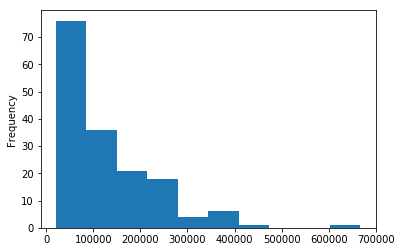

In [39]:
df.actual_price.plot(kind='hist')

#### Laptops in the range of 30k-60k with 1 TB hard disk and 8GB ram (Economical range)

In [40]:
df[(df.final_price>30000)&(df.final_price<60000) & (df['hd_size(GB)']==1024) & (df['ram_size']==8)]

,Name,actual_price,discout,final_price,generation,graphic_card,hard_disk,included_items,os_installed,processor,processor_company,processor_type,ram,rating,ram_size,hd_size(GB)
2,HP Notebook - 15-da0435tx,50292,5712,44580,7,NVIDIA® GeForce® MX110 (2 GB DDR3 dedicated),1 TB 5400 rpm SATA,Not provided,Windows 10 Home Single Language 64,7th Generation Intel® Core i3 processor,Intel,i3,8 GB DDR4-2133 SDRAM (1 x 8 GB),4.0000,8,1024
3,HP Notebook - 15g-dr0006tx,66137,7146,58991,8,NVIDIA® GeForce® MX110 (2 GB DDR3 dedicated),1 TB 5400 rpm SATA,"HP Original Laptop Bag (Worth ?1,123),1 Year O...",Windows 10 Home Single Language 64,8th Generation Intel® Core i5 processor,Intel,i5,8 GB DDR4-2400 SDRAM (1 x 8 GB),4.0625,8,1024
5,HP Pavilion - 15-cw0027au,70025,10035,59990,1.0,AMD Radeon Vega 8 Graphics,1 TB 5400 rpm SATA + 128 GB SSD,"HP Trendsetter Bag (Worth ?2,356)",Windows 10 Home Single Language 64,AMD Ryzen 5 processor,AMD,Ryzen 5,8 GB DDR4-2400 SDRAM (1 x 8 GB),3.0000,8,1024
48,HP 348 G4 Notebook PC,55539,2756,52783,7,Intel® HD Graphics 620,1 TB 7200 rpm SATA,"HP Original Bag (Worth ?1,499) (#5DD44PA)",FreeDOS,7th Generation Intel® Core i5 processor,Intel,i5,8 GB DDR4-2133 SDRAM (1 x 8 GB),5.0000,8,1024
115,HP Notebook - 15-da0074tx,46010,6516,39494,7,NVIDIA® GeForce® MX110 (2 GB DDR3 dedicated),1 TB 5400 rpm SATA,"HP Original Laptop Bag (Worth ?1,123)",FreeDOS 2.0,7th Generation Intel® Core i3 processor,Intel,i3,8 GB DDR4-2133 SDRAM (1 x 8 GB),5.0000,8,1024
117,HP Notebook - 15-da0077tx,57786,7065,50721,8,NVIDIA® GeForce® MX110 (2 GB GDDR5 dedicated),1 TB 5400 rpm SATA,"HP Original Laptop Bag (Worth ?1,123),1 Year O...",FreeDOS 2.0,8th Generation Intel® Core i5 processor,Intel,i5,8 GB DDR4-2400 SDRAM (1 x 8 GB),5.0000,8,1024


### which processor is used more

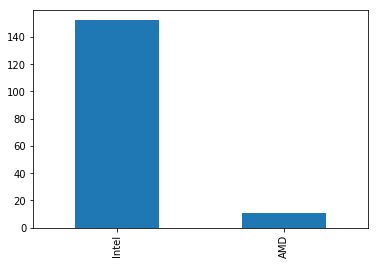

In [41]:
df.processor_company.value_counts().plot(kind='bar')

Intel company processor is used more

### which processor is mostly used

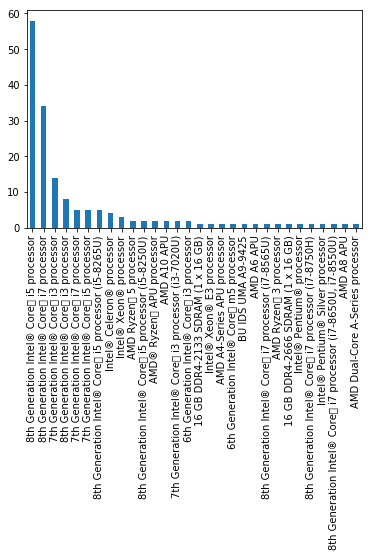

In [42]:
df.processor.value_counts().plot(kind='bar')

In [43]:
df.groupby(['processor_company']).mean()

,actual_price,discout,final_price,rating,ram_size,hd_size(GB)
processor_company,,,,,,
AMD,57390.000000,2974.181818,54415.818182,1.712127,5.818182,625.454545
Intel,134072.809211,22852.592105,111220.217105,1.156910,8.842105,796.894737


### which os is mostly used

In [44]:
df.os_installed.value_counts()

Windows 10 Pro 64                                                     85
Windows 10 Home Single Language 64                                    43
FreeDOS 2.0                                                           13
Chrome OS 64                                                          5
Windows 10 Home 64                                                     3
Windows 10 Home Single Language 64  HP recommends Windows 10 Pro.     3
FreeDOS                                                                2
Windows 10 Pro 64  HP recommends Windows 10 Pro.                      2
Free DOS                                                               1
FreeDos 2.0                                                            1
Windows 7 Professional 64                                              1
FreeDOS 3.0                                                            1
8th Generation Intel® Core i5 processor                               1
Windows 10 Pro                                     

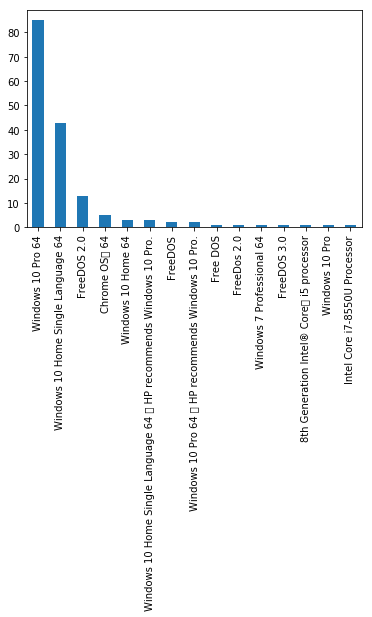

In [45]:
df.os_installed.value_counts().plot(kind='bar')

### Does ram size effects price

In [46]:
df.ram_size.corr(df.actual_price)

0.76195099638699681

#### Those two columns have a good correlation

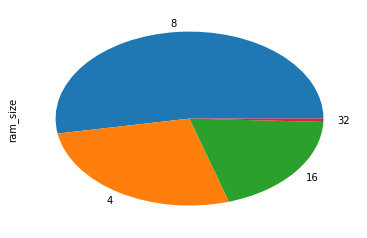

In [47]:
df.ram_size.value_counts().plot(kind='pie')

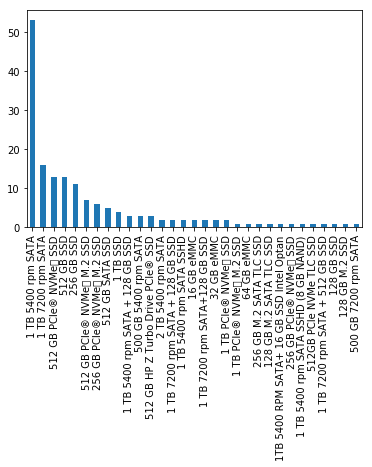

In [48]:
df.hard_disk.value_counts().plot(kind='bar')

In [49]:
df.corr()

,actual_price,discout,final_price,rating,ram_size,hd_size(GB)
actual_price,1.000000,0.856027,0.956428,-0.237846,0.761951,-0.124959
discout,0.856027,1.000000,0.667800,-0.233100,0.498787,-0.133535
final_price,0.956428,0.667800,1.000000,-0.210822,0.815429,-0.104509
rating,-0.237846,-0.233100,-0.210822,1.000000,-0.033313,0.152389
ram_size,0.761951,0.498787,0.815429,-0.033313,1.000000,-0.032704
hd_size(GB),-0.124959,-0.133535,-0.104509,0.152389,-0.032704,1.000000


In [50]:
df.describe()

,actual_price,discout,final_price,rating,ram_size,hd_size(GB)
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,128897.895706,21511.104294,107386.791411,1.194378,8.638037,785.325153
std,100316.252958,39349.265400,69667.796932,1.831696,4.487049,511.257767
min,20999.000000,0.000000,20999.000000,0.000000,4.000000,16.000000
25%,61889.500000,1886.000000,58016.000000,0.000000,4.000000,512.000000
50%,88742.000000,3286.000000,84390.000000,0.000000,8.000000,1024.000000
75%,173869.500000,11370.000000,146606.000000,2.235350,8.000000,1024.000000
max,667152.000000,224481.000000,442671.000000,5.000000,32.000000,5400.000000


In [51]:
df.describe(include=[np.object]).transpose()

,count,unique,top,freq
Name,163,93,HP ZBook 15u G5 Mobile Workstation,9
generation,163,4,8,99
graphic_card,163,38,Intel® UHD Graphics 620,56
hard_disk,163,31,1 TB 5400 rpm SATA,53
included_items,163,23,Not provided,32
os_installed,163,15,Windows 10 Pro 64,85
processor,163,30,8th Generation Intel® Core i5 processor,58
processor_company,163,2,Intel,152
processor_type,163,16,i5,73
ram,163,33,8 GB DDR4-2400 SDRAM (1 x 8 GB),56


In [52]:
print(df[df.actual_price>100000]['Name'].unique())


['HP Pavilion 14-ce1003tx' 'HP EliteBook x360 1030 G3 Notebook PC'
 'HP EliteBook 830 G5 Notebook PC' 'HP EliteBook 840r G4 Notebook PC'
 'HP ProBook x360 440 G1 Notebook PC' 'HP ZBook 15v G5 Mobile Workstation'
 'OMEN by HP - 15-dc0084tx' 'HP EliteBook x360 1030 G2'
 'HP EliteBook 1040 G4 Notebook PC'
 'HP EliteBook x360 1030 G2 (ENERGY STAR)' 'HP ProBook 430 G6 Notebook PC'
 'HP ZBook 15u G5 Mobile Workstation' 'HP Pavilion x360 14-dh0045tx'
 'HP ZBook 14u G5 Mobile Workstation' 'HP Spectre x360 - 13-ap0122tu'
 'HP Spectre x360 - 13-ap0121tu' 'HP Spectre x360 - 13-ap0102tu'
 'HP Spectre x360 - 13-ap0101tu' 'HP Spectre x360 - 13-ap0100tu'
 'HP ZBook 17 G5 Mobile Workstation' 'HP EliteBook 735 G5 Notebook PC'
 'HP EliteBook 1050 G1 Notebook PC' 'HP ZBook Studio G5 Mobile Workstation'
 'HP ZBook 15 G5 Mobile Workstation'
 'HP ZBook x2 G4 Detachable Workstation'
 'HP ZBook Studio x360 G5 Convertible Workstation' 'HP ENVY - 13-ah0044tx'
 'HP ProBook 640 G4 Notebook PC' 'HP ZBook 15u G4 Mo

**Laptop with highest price**

In [53]:
df[df.actual_price==df.actual_price.max()]

,Name,actual_price,discout,final_price,generation,graphic_card,hard_disk,included_items,os_installed,processor,processor_company,processor_type,ram,rating,ram_size,hd_size(GB)
85,HP ZBook 17 G5 Mobile Workstation,667152,224481,442671,7,NVIDIA® Quadro® P4200 (8 GB GDDR5 dedicated),512 GB PCIe® NVMe SSD,Not provided,Windows 10 Pro 64,Intel® Xeon® processor,Intel,Xeon®,32 GB DDR4-2666 ECC SDRAM (2 X 16 GB),0.0,32,512


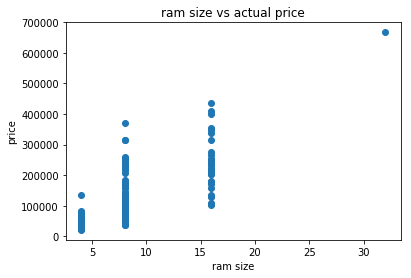

In [63]:
plt.title("ram size vs actual price")
plt.xlabel("ram size")
plt.ylabel("price")
plt.scatter(df['ram_size'],df['actual_price'])

### Conclusion

- Intel company processors are mostly preferred 
- Windows 10 Pro 64 and 8th Generation Intel i5 processor is used in good number
- ram size effect the price of laptops.They have good correlation 0.7
- 9 laptops models are there in economical range
- 34 laptop models are there with price greater than one lakh
- 1 TB 5400 RPM SATA is used for many models